# Lesson 3: Matrix Operations

Similarly to how we could use 1D NumPy arrays to represent a vector, we can extend this to two dimensions to store matrices.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-d_b8swkt because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Creating 2D Arrays

You can specify each entry using a list of lists:

In [2]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

The shape of this array is specified as $(\text{rows}, \text{columns})$:

In [3]:
A.shape

(3, 3)

There are also some functions to create specific matrices

In [4]:
I = np.eye(5)
I

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

To specify a two dimensional array we can give the shape as a tuple

In [5]:
ones = np.ones((4, 4))
ones

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [6]:
zeros = np.zeros((3, 5))
zeros

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [7]:
d = np.array([1, 2, 3, 4])
D = np.diag(d)
D

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

## Addition and Multiplication

Just like for vectors we can add/subtract matrices and multiply by a scalar

In [8]:
I * 5

array([[5., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0.],
       [0., 0., 5., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 5.]])

In [9]:
np.ones((3, 3)) - np.eye(3)

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]])

### Matrix-matrix and Matrix-vector multiplication

Numpy gives us built-in functions to multiply different matrices together.

In [10]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

We can multiply a $2\times 3$ matrix by a $3 \times 2$ matrix to get a $2\times 2$ matrix in return.

In [12]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

What happens when we try to multiply two matrices whose shape doesn't match?
Lets try multiplying a $2\times 3$ by a $2\times 3$ matrix.

In [13]:
np.dot(A, A)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

So we will have to be careful that the shapes of our arrays align.

We can also use the `@` symbol as shorthand for `np.dot()`

In [14]:
A @ B

array([[22, 28],
       [49, 64]])

`np.dot()` also allows us to multiply a matrix by a vector:

In [15]:
x = np.array([-1, 0, 1])
A @ x

array([2, 2])

## Other matrix functions

Matrix transposition:

In [16]:
A = np.array([[1, 2], [3,4]])
A

array([[1, 2],
       [3, 4]])

In [17]:
print(A.T)
print(np.transpose(A))

[[1 3]
 [2 4]]
[[1 3]
 [2 4]]


## Solving a system

We will need to import some linear algebra functions from NumPy:

In [18]:
import numpy.linalg as la


Given a matrix $\boldsymbol{A}$ and vector $\boldsymbol{b}$, we can solve $\boldsymbol{Ax}=\boldsymbol{b}$ for some vector $\boldsymbol{x}$.

In [19]:
A = np.array([[1, 2], [3, 4]])
b = np.array([1, 2])

In [20]:
la.solve(A, b)

array([0. , 0.5])

In [21]:
A_singular = np.ones((2, 2))
A_singular

array([[1., 1.],
       [1., 1.]])

In [22]:
la.solve(A_singular, b)

LinAlgError: Singular matrix

So we also need to be careful of trying to solve inconsistent systems of equations.

# Images as Matrices

A grayscale image of size $m\times n$ can be stored as a NumPy array of the same size, with the value at each "pixel" representing the intensity at that point, some value between $0$ and $1$.  A value of `0` represents total black, while `1` represents full white.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
lincoln = np.loadtxt("lincoln.txt")

Inspect the size of the matrix that contains the image:

In [25]:
lincoln.shape

(321, 269)

You can check the min and max values of the array:

In [26]:
print(lincoln.max())

1.0


In [27]:
print(lincoln.min())

0.0196078431372549


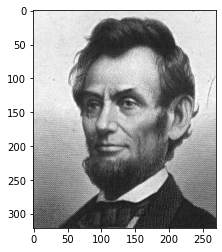

In [28]:
plt.figure()
plt.imshow(lincoln, cmap="gray", vmin=0, vmax=1)

**Try this!**


The `vmin` and `vmax` tell Matplotlib what our range of values should be, but what does the `cmap` argument do?  Try setting it to `plasma` or `twilight` (without using the `vmin` and `vmax` attributes).

**Try this!**

What happens when you plot the transpose of the image?

**Try this!**

How can we invert the colors of the image? 

Recall that our image has values between 0 and 1. If we want black "pixels" to become white, and white to become black, we can accomplish that by computing `1 - pixel`. 

**But first...** take a look at this:

`lincoln` is a 2d array with the image. `1` is a scalar. Before you try to plot, check what happens when you try to subract an array from a scalar. This is something new Python users will find very surprising!

### Exercise: Shifting the Mean

Given a list of numbers, how can we change change the mean without changing the distribution of the numbers? That is, without changing the distances between the numbers?

Consider the list of numbers: 3,4,4,5,5,6,6,6,7,8,10,12
The mean of these numbers is 

mean= 6.333333333333333


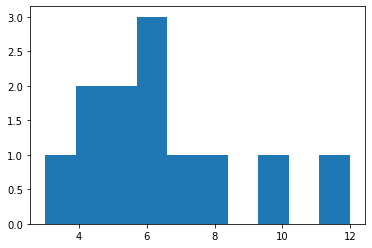

In [29]:
Numbers = np.array([3,4,4,5,5,6,6,6,7,8,10,12])
print("mean=",np.mean(Numbers))
NumbersPlot = plt.hist(Numbers)

If I add 5 to each of the numbers, all this does is shift the distribution up by 5.

New Numbers= [ 8  9  9 10 10 11 11 11 12 13 15 17]
New mean =  11.333333333333334


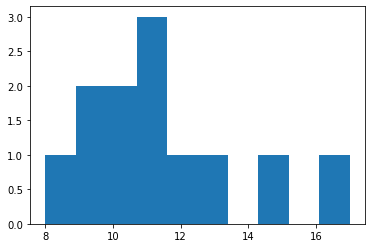

In [30]:
NewNumbers = Numbers+5
print("New Numbers=", NewNumbers)
print("New mean = ", np.mean(NewNumbers))
NewPlot = plt.hist(NewNumbers)

Notice that the distribution of the new numbers is exactly the same, but shifted up by 5.

**Answer in your group**: What happens to the mean of a list of numbers if I add the same constant to each one of them? 

### Changing Image Values

Currently, the values in our image range from $\left[0, 1\right]$, but what if we were to scale up or scale down these values?  We can plot the image scaled by `2`, but still using vmin=0 and vmax=1

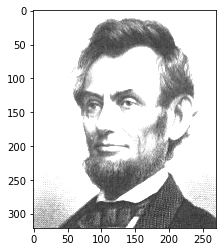

In [31]:
bright = lincoln * 2
plt.imshow(bright, cmap="gray", vmin=0, vmax=1)

The maximum image values are now blown out past the range $\left[0, 1\right]$ (that is why you are observing more white regions). Take a look at the **mean** for this new image:

In [34]:
np.mean(bright)

1.1130194634223771

**Check your answers!**

Let's try adjusting the values of the image **`bright`** so that the mean (average) value is now exactly in the middle of $\left[0, 1\right]$, i.e. `0.5`.

**Hint: What operation changes the mean but does not affect the distance between values?  You need to shift, not scale, each value by some number.**

Store your new image with 0.5 mean as `image_centered`.

In [39]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 

image_centered = bright - np.mean(bright) + .5
print(np.mean(image_centered))

0.49999999999999983


You can plot the `image_centered` to see the adjusted image using `plt.imshow`.

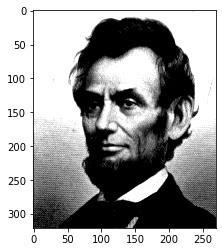

In [40]:
plt.imshow(image_centered, cmap="gray", vmin=0, vmax=1)

What we have done here is adjust the contrast of the image so that light values are lighter, and dark values are darker.  We can do this in the opposite direction as well to reduce the contrast values.  

**Check your answers!**

First multiply the image `lincoln` by `0.5` and then shift the values so the mean is exactly `0.5`. Store the adjusted array in `lincoln_adjusted`.

In [41]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 

lincoln_adjusted = lincoln * .5 
lincoln_adjusted = lincoln_adjusted - np.mean(lincoln_adjusted) + .5

You can plot the `lincoln_adjusted` to see the adjusted image using `plt.imshow`.

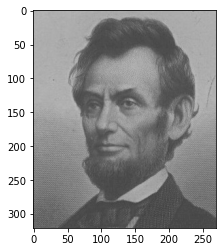

In [42]:
plt.imshow(lincoln_adjusted, cmap="gray", vmin=0, vmax=1)

# Transformations of Points

One way we can think of matrices is as a linear function $f(\boldsymbol{x}) : \mathbb{R}^n \to \mathbb{R}^m$, where $f(\boldsymbol{x}) = \boldsymbol{Ax}$ for some matrix $\boldsymbol{A}$.  These can be used to represent various operations in 2D.

In [43]:
x = np.array([1, 2])

We will start with a point at $\left(1, 2\right)$

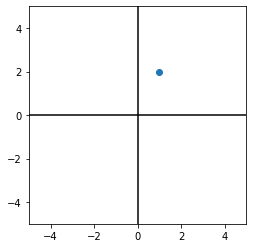

In [45]:
ax = plt.gca()
ax.set_aspect('equal')


# Set the axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Create lines for the x and y axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.plot(x[0], x[1], 'o')


We can create a transformation to scale the point by two along each axis. This scale transformation is given by the identity matrix multiplied by the scale factor.

In [46]:
scale = np.eye(2) * 2
scale

array([[2., 0.],
       [0., 2.]])

In [47]:
x_transformed = scale @ x

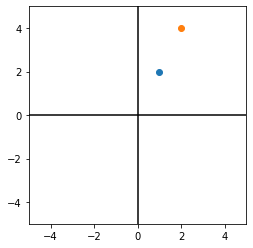

In [48]:
ax = plt.gca()
ax.set_aspect('equal')

# Set the axis limits
plt.xlim(-5,5)
plt.ylim(-5,5)

# Create lines for the x and y axes
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# Plot our points
plt.plot(x[0], x[1], 'o')
plt.plot(x_transformed[0], x_transformed[1], 'o')

### Transformations on Many Points

While it is certainly interesting to apply a transformation to a single point, we can apply these transformations to multiple points to rotate entire shapes and figures.  Here you are given a 2D version of the [Stanford bunny](https://en.wikipedia.org/wiki/Stanford_bunny?wprov=sfti1), a 3D model commonly used for testing computer graphics techniques.

In [49]:
bunny = np.loadtxt("bunny.txt")

This figure is given as a $2 \times N$ array of points, with the first "row" corresponding to the x-value of each point, and the second "row" with the y-value.  So we can plot the figure by separating the x and y coordinates and giving them to `matplotlib`'s `plot()` function.

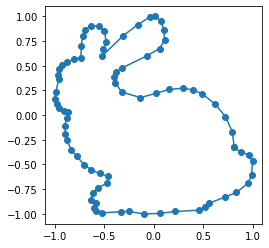

In [50]:
ax = plt.gca()
ax.set_aspect('equal')
ax.plot(bunny[0], bunny[1], 'o-')

So how can we transform the entire figure?  Perhaps the "obvious" solution here is to loop over each point individually and multiply it by our transformation.

Here we create a new copy of the bunny figure scaled by three along the $y$ axis and unchanged along the $x$ axis, using a transformation matrix as above.  You can access a single column of an array using the notation `array[:,i]`.  

[[1 0]
 [0 3]]


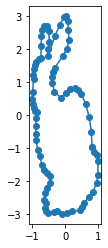

In [51]:
stretch = np.diag([1, 3])
print(stretch)
bunny_squash = np.zeros_like(bunny)

# Loop over each point to apply the transformation
for i in range(len(bunny[1])):
    bunny_squash[:,i] = stretch @ bunny[:,i]

ax = plt.gca()
ax.set_aspect('equal')
ax.plot(bunny_squash[0], bunny_squash[1], 'o-')

That seems like an awful lot of work for such a simple operation.  If our transformation is a $2\times 2$ matrix and our points are stored in an array of shape $2\times N$, is there an easier way to have Numpy transform the entire figure at once? 

**Check your answers!**

First, use your knowledge from linear transformations to write the $2\times 2$ transformation matrix that streches a image in the x-direction by a factor of two. Store it as `stretch`.

In [52]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
stretch = np.array([[2,0],[0,1]])

Now we can use matrix-matrix multiplications to get our new transformed image. Look how we have accomplished the same thing, but much simpler computation!

In [1]:
bunny_squash = stretch @ bunny

ax = plt.gca()
ax.set_aspect('equal')
ax.plot(bunny_squash[0], bunny_squash[1], 'o-')

NameError: name 'stretch' is not defined

**Try this!**

Now we will try out some other transformations.  Create a matrix operator to mirror points around the x-axis, meaning the y coordinate should be flipped and the x coordinate should remain unchanged.  

Store your image as `bunny_mirror`.

Plot the transformed figure to make sure your transformation works correctly.

In [ ]:
# Apply the mirror transformation on bunny
bunny_mirror = ...


ax = plt.gca()
ax.set_aspect('equal')
ax.plot(bunny_mirror[0], bunny_mirror[1], 'o-')

We can also represent the rotation operation using matrices as well.  Given a point $\left(x, y\right)$ the rotated point around the origin is given by (you will later learn how to derive these equations):
$$x^\prime = x\cos\theta - y\sin\theta$$
$$y^\prime = x\sin\theta + y\cos\theta$$
**Check your answers!**

Using the equations above, create and plot a rotation 90 degrees counter-clockwise around the origin.  **Hint: how can you turn the above into a matrix? Can you rewrite this as $\begin{bmatrix}x^\prime\\y^\prime\end{bmatrix}={\bf R}\begin{bmatrix}x\\y\end{bmatrix}$?**

First store the rotation matrix corresponding to a 90 degree rotation in `R` (note: use radians with `np.pi`):

In [54]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
R = np.array([[np.cos(np.pi / 2), -np.sin(np.pi / 2)], [np.sin(np.pi / 2), np.cos(np.pi / 2)]])

Then store the rotated bunny in `bunny_rot`:

In [57]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
bunny_rot = R @ bunny

What does the rotation matrix look like?  Is the structure similar to the identity matrix and mirror transformation from above? Plot the rotated bunny below:

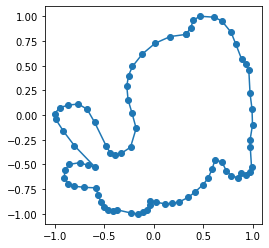

In [58]:
ax = plt.gca()
ax.set_aspect('equal')
ax.plot(bunny_rot[0], bunny_rot[1], 'o-')

By multiplying these matrices together, we can combine multiple operations into one matrix:

$$\boldsymbol{T}_{\text{rot}} \boldsymbol{T}_{\text{scale}} \boldsymbol{x} = \left(\boldsymbol{T}_{\text{rot}} \boldsymbol{T}_{\text{scale}}\right) \boldsymbol{x} = \boldsymbol{T}_{\text{both}} \boldsymbol{x}$$

Note that the first transformation we apply is first on the left multiplying our vector — matrix multiplication in general is not commutative so this distinction is important.

**Check your answers!**

Try creating a transformation matrix that first scales points by two in each direction, then rotates 90 degrees counter-clockwise around the origin. Store the transformed bunny in `bunny_trans`.

In [62]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
scaling2 = np.array([[2,0],[0,2]])
bunny_scale2 = ( scaling2 @ bunny)
bunny_trans = R @ bunny_scale2

Now plot the transformed bunny:

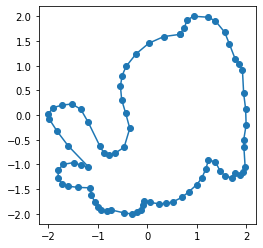

In [63]:
ax = plt.gca()
ax.set_aspect('equal')
ax.plot(bunny_trans[0], bunny_trans[1], 'o-')

Note that in this case it actually didn't matter if we rotated first then scaled, or scaled first then rotated. **But** this is not always the case; lets explore the commutativity of the rotation matrix from above and the matrix that stretches points along the x axis.

**Try this!**

Plot bunny transformed first by the stretch operator, then rotated 90 degrees CCW around the origin.

NameError: name 'bunny_rot_stretch' is not defined

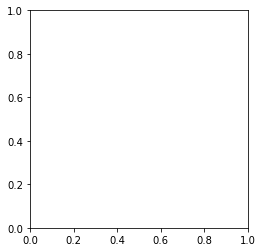

In [64]:
# Define the bunny_rot_stretch by applying rotation and stretch to the bunny

ax = plt.gca()
ax.set_aspect('equal')
ax.plot(bunny_rot_stretch[0], bunny_rot_stretch[1], 'o-')

**Try this!**

Now plot the bunny with the transformations in the opposite order: first rotated then stretched.

In [ ]:
# Define the bunny_stretch_rot by applying stretch and rotation to the bunny

ax = plt.gca()
ax.set_aspect('equal')
ax.plot(bunny_stretch_rot[0], bunny_stretch_rot[1], 'o-')

# Transforming Vectors

Recall from last week that we can use a vector to store function values in one dimension.  Here we will build on that, creating matrices that will transform these sets of y-values.

### Shifting a sine wave

Here is a vector of length `24` containing a sine wave and its associated plot.

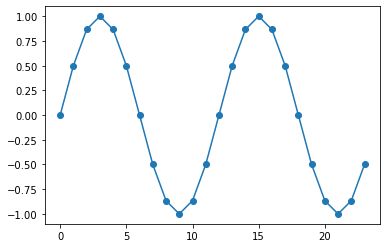

In [65]:
sine = np.sin(np.linspace(0, np.pi * 4, 25))[:24] # chop off the ending, so we don't get duplicate points!
plt.plot(sine, 'o-')

**Check your answers!**

One operation we can do on this is to "shift" each value to the left, transforming it into the plot of a cosine wave.  We can achieve this by creating a $24 \times 24$ matrix to multiply the above vector. You will define a matrix that shifts each point three values to the left, and then plot it to verify your solution.

But let's start off with shifting something a little smaller. Watch what happens when you do the following matrix multiplication.

In [66]:
vector = np.array([1,2,3,4,5,6])
matrix = np.zeros((6,6))
matrix[0,2] = 1
matrix[1,3] = 1
matrix[2,4] = 1
matrix[3,5] = 1
matrix[4,0] = 1
matrix[5,1] = 1
print(matrix)
print(matrix @ vector)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
[3. 4. 5. 6. 1. 2.]


**Try This!**

Why did this matrix shift the vector in this way?

Hint: think of the identity matrix.  For each point (row) it returns $1\times$the original point and $0\times$ everything else, so when multiplying any vector it gives back the original. What if the first row of the matrix only had a 1 in the second position? What point would it return?

Creating the shift matrix this way is a bit cumbersome however. Take a look at the documentation for [`np.roll`](https://numpy.org/doc/stable/reference/generated/numpy.roll.html).

How could we use this to create our above matrix but without having to manually assign each entry in the matrix? Try and figure out what value of `shift_value` gives us the matrix from the previous cell and experiment with different shift values to see how `np.roll` works.

In [71]:
roll_matrix = sine = np.sin(np.linspace(0, np.pi * 4, 25))[:24]
shift_value = 4
roll_matrix = np.roll(roll_matrix, shift_value, axis=0)
print(roll_matrix)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


Now, going back to our original goal. Create a graph of a cosine wave by shifting each value of the sine wave 3 to the left. 

Store the transformation matrix in `shift` and the shifted sine array in `sine_shifted`.

In [72]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
sine_shifted = np.eye(24)
shift_value = -3
shift = np.roll(sine_shifted, shift_value, axis=0)
sine_shifted = shift @ sine
print(sine_shifted)

[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  1.22464680e-16
 -5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01
 -5.00000000e-01 -2.44929360e-16  5.00000000e-01  8.66025404e-01
  1.00000000e+00  8.66025404e-01  5.00000000e-01  3.67394040e-16
 -5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01
 -5.00000000e-01  0.00000000e+00  5.00000000e-01  8.66025404e-01]


Now plot the shifted sine wave:

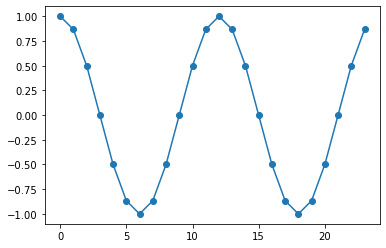

In [73]:
plt.plot(sine_shifted, 'o-')

To help understand the shape and structure of your operator, print out the matrix. You can use Python's built-in `print()` function, and/or Matplotlib's `plt.imshow()` for a more visual depiction.

In [ ]:
print(shift)
plt.imshow(shift)

### Extra example 1: Smoothing 

(these are more challenging examples, but very interesting in case you have a chance to try them out!)

Here we have a "noisy" set of values that we would like to smooth.

In [ ]:
noisy = sine + np.random.random(24)
plt.plot(noisy, 'o-')

Create a matrix that when multiplying the above vector, will smooth each point by taking the average of it and its left and right neighbours.  For points at the edges (`0` and `23`), you should only take the average of that point and the neighbour that actually exists.  Plot your smoothened vector.

In [ ]:
smooth = np.identity(24)

for i in range(24):
    if i == 0:
        smooth[0,0] = 0.5
        smooth[0,1] = 0.5
    elif i == 23:
        smooth[23,23] = 0.5
        smooth[23,22] = 0.5
    else:
        smooth[i,i] = 1.0/3.0
        smooth[i,i-1] = 1.0/3.0
        smooth[i,i+1] = 1.0/3.0

smooth_vec = smooth @ noisy
plt.plot(smooth_vec, 'o-')

Again, print the matrix to understand the structure of your operator.

In [ ]:
print(smooth)
plt.imshow(smooth)

Random thought experiment: what happens if you apply the smoothing 100 times? 1000 times?

In [ ]:
smooth_vec = noisy
for i in range(10):
    smooth_vec = smooth @ smooth_vec

plt.plot(smooth_vec, 'o-')

### Extra example 2: Edge Detection

A common problem that comes up in signal processing is to find when a signal changes from a high to a low value, or low to a high value.  This is called *edge detection*, and to find these signal changes we can combine some of the above operators.

Here you are given a small step function with discernable "edges", so that we can easily determine what our output should be.

In [ ]:
square = np.zeros(24)
square[8:12] = 1
square[16:] = 1
plt.plot(square)

**Try this!**

Use the `smooth` operator defined in the previous section and apply it to the `square` function above. Store your result as `smoothened_version`.


Take a look at what happens to your `square` function:

In [ ]:
smoothened_version = ...


plt.figure()
plt.plot(square)
plt.plot(smoothened_version)

As you can see, the smoothened vector has dampened the extreme values somewhat.  If we subtract the original array minus the smoothened one, we can actually isolate these extreme values and determine when they occur.  

**Try this!**

Define the new array `diff` as $\boldsymbol{x} - \boldsymbol{x}_\text{smooth}$

In [ ]:
diff = ...


plt.plot(square)
plt.plot(diff)

Each of the "peaks" you see occur when the value of the wave changes.  Lets combine this into one operator:
$$ \boldsymbol{x} - \boldsymbol{T}_\text{smooth}\boldsymbol{x} = \left(\boldsymbol{I} - \boldsymbol{T}_\text{smooth}\right)\boldsymbol{x}$$
Note that the $\boldsymbol{I}$ here refers to the identity matrix of same shape as $\boldsymbol{T}$.

Create and plot this transformation below, and confirm that it is identical to the plot above.

In [ ]:
edge = np.eye(24) - smooth

plt.plot(square)
plt.plot(edge @ square)

Again, print the matrix to understand the structure of your operator.

In [ ]:
print(edge)
plt.imshow(edge)